# Exam simulation
## Starting time: 14.30
## End before: 19.30
## Actual ending time: 

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.integrate import trapezoid
from matplotlib.ticker import MaxNLocator
import pandas as pd
import seaborn as sns

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * display the histograms as data points with errors (the error being the poisson uncertainty)
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


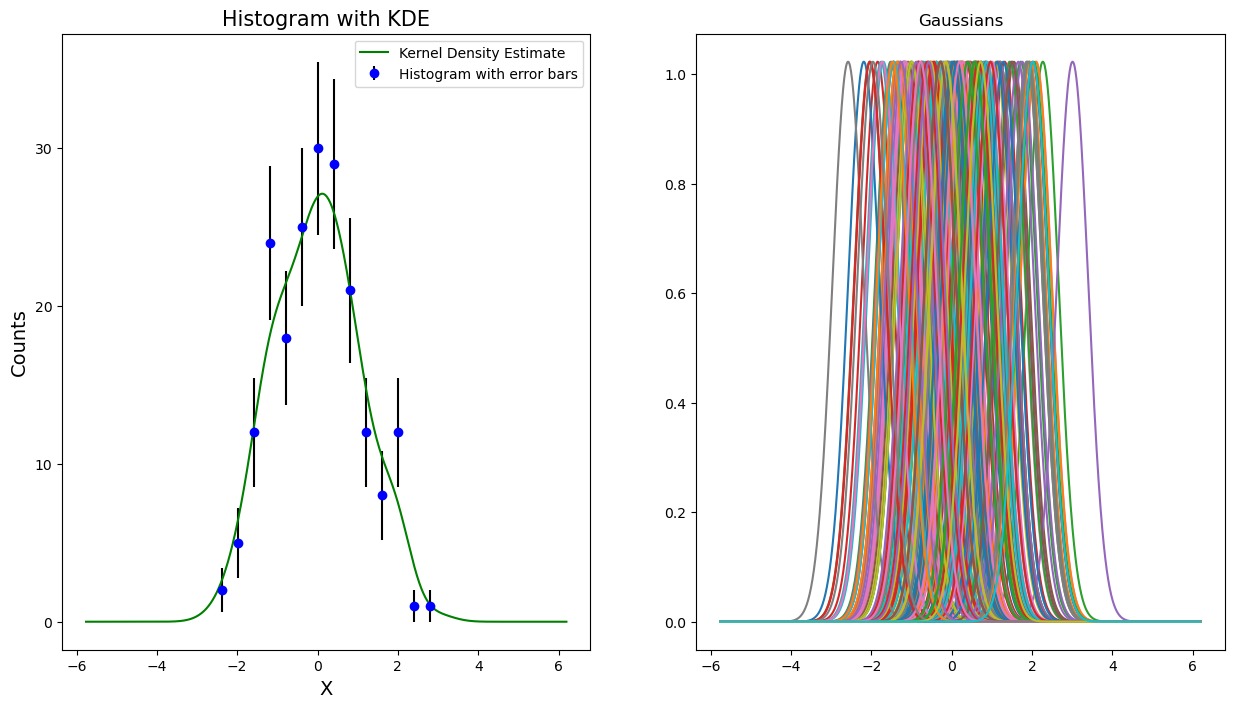

In [156]:
# Fill a numpy array, x, of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
mu = 0
sigma = 1
N = 200
x = np.random.normal(mu, sigma, N)

# Fill an histogram in pyplot taking properly care about the aesthetic
counts, bin_edges = np.histogram(x, bins = int(np.sqrt(N))) # Simple rule of thumb for the choice of bin's number
centers = (bin_edges[1:]+bin_edges[:-1])/2
count_error = np.sqrt(counts) # error as Poisson uncertainty

fig, (axs1, axs2) = plt.subplots(1,2,figsize=(15, 8)) # Create the canvas 

axs1.errorbar(centers, counts, yerr = count_error, fmt = 'o', color = 'blue', ecolor = 'black', label = 'Histogram with error bars') #plot
axs1.set_xlabel('X',fontsize=14)
axs1.set_ylabel('Counts',fontsize=14) # Set a proper y axis label
axs1.set_title('Histogram with KDE',fontsize=15)
axs1.legend(loc='best')
axs1.yaxis.set_major_locator(MaxNLocator(4, integer = True)) # Place evenly spaced ticks, with a cap on the total number of ticks.
                                                            # This is the only locator that allows to specify the type. 
                                                            # Another option could've been MultipleLocator(1) # Ticks every 1 unit

# KDE --> KDE uses a "kernel" function to create a smooth estimate of the PDF by summing small, individual distributions (centered at each data point) and scaling them appropriately. 
# The resulting curve provides an estimate of the density of the data at each point.

# Create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned.
std = 1.06*x.std()*x.size**(-(1/5))
gaussians = []
x_axis = np.linspace(x.min()- 3 * x.std(), x.max()+3*x.std(), 1000)
for data in x: 
    gaussian = stats.norm.pdf(x_axis, data, std)
    gaussians.append(gaussian)
    axs2.plot(x_axis, gaussian) # Plot all the gaussians
    axs2.set_title("Gaussians")
    

# Sum (with np.sum()) all the gaussian functions and normalize the result
kde = np.sum(gaussians, axis = 0) # Kde not normalized --> axis = 0 because of the gaussians'shape (check)
normalization = trapezoid(kde, x_axis)
bin_width = (x.max() - x.min())/np.sqrt(N)
hist_norm = N * bin_width # This is because the integral of the hist would be the sum of the counts_per_bin*bin_width_of_that_bin, but here bin_width is constant
kde_norm = (kde/normalization)*hist_norm 
axs1.plot(x_axis, kde_norm , color = 'green', label = "Kernel Density Estimate")
axs1.legend(loc = 'best')
plt.show();


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

(10, 2)


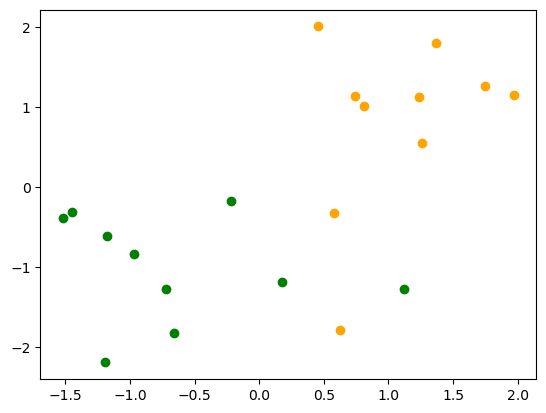

In [167]:
# Simpler case with two categories

mu = [[-1,-1], [1,1]] # Means for each category
sigma = [1,1] # Std for each category
cov = np.eye(2)# multivariate_normal requires covariance matrix
N_samples = [10,10]

cat_one = np.random.multivariate_normal(mu[0], cov, N_samples[0])
cat_two = np.random.multivariate_normal(mu[1], cov, N_samples[1])

print(np.shape(cat_one))

plt.scatter(cat_one[:,0], cat_one[:,1], color = 'green')
plt.scatter(cat_two[:,0], cat_two[:,1], color = 'orange') 

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

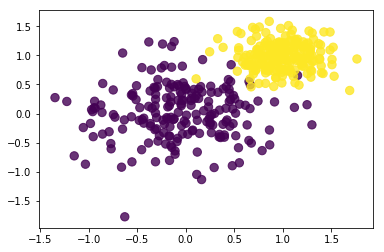

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

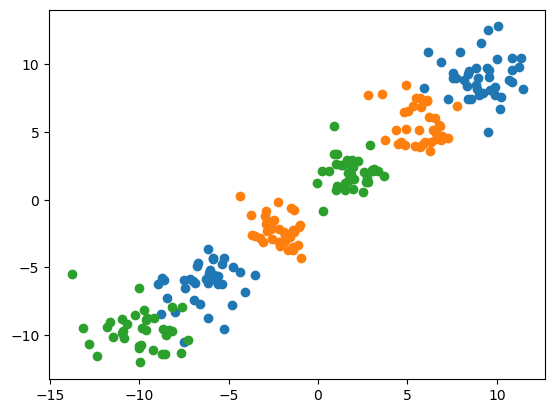

In [185]:
# Let's try to implement the N categories case
N = 3 # Number of categories

for cat in range(N): 
    mean = np.random.choice(np.arange(-10,10,1/(2*N)), size = 2, replace = False) # Same for variances choice
    matrix = np.random.choice(np.arange(1,3,1/(2*N)), size = (2,2), replace = True) # Same for variances choice
    cov = (matrix + matrix.T) // 2 # Make it symmetric
    N_samples = np.random.choice(np.arange(5,10), size = N, replace = True)
    category = np.random.multivariate_normal(mean, cov, N_samples)
    plt.scatter(category[0], category[1])
    

In [1]:
# Another way to do this exercise is the following
# Write a function that generates a 2D datasets of 2 categories. 
# Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)

def twoD_data(cat1, cat2): 
    m1, s1, nd1 = cat1
    m2, s2, nd2 = cat2
    data1 = np.random.multivariate_normal(m1, np.diag([s1]*2), nd1)
    data2 = np.random.multivariate_normal(m2, np.diag([s2]*2), nd2)
    plt.scatter(data1[:,0], data1[:,1])
    plt.scatter(data2[:,0], data2[:,1])
    return data1, data2

_ = twoD_data(([0.5,0.5],0.5, 100), ([-0.5,-0.5],0.5, 150))
plt.show()

# Try to make the procedure more general by allowing a given number n>2 of categories

def nD_data(ncat, cats):
    data_cats = []
    for cat in range(ncat): 
        mcat, scat, ndcat = cats[cat]
        data_cat = np.random.multivariate_normal(mcat, np.diag([scat]*2), ndcat)
        data_cats.append(data_cat)
        plt.scatter(data_cat[:,0], data_cat[:,1])
    return data_cats

_ = nD_data(4, [([0.5,0.5],0.5, 100), ([-0.5,-0.5],0.5, 150), ([-0.5,0.5],0.5, 150), ([0.5,-0.5],0.5, 100) ])
plt.show()

NameError: name 'np' is not defined

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [186]:
#! curl -L -O https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   125  100   125    0     0    492      0 --:--:-- --:--:-- --:--:--   492
100    17  100    17    0     0     21      0 --:--:-- --:--:-- --:--:--    21
100   470    0   470    0     0    329      0 --:--:--  0:00:01 --:--:--     0
100  246k  100  246k    0     0   126k      0  0:00:01  0:00:01 --:--:--  126k


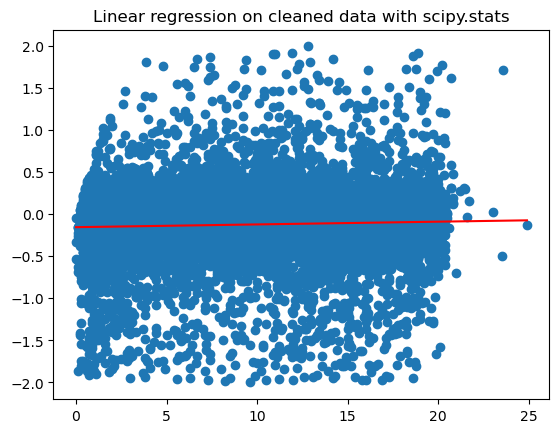

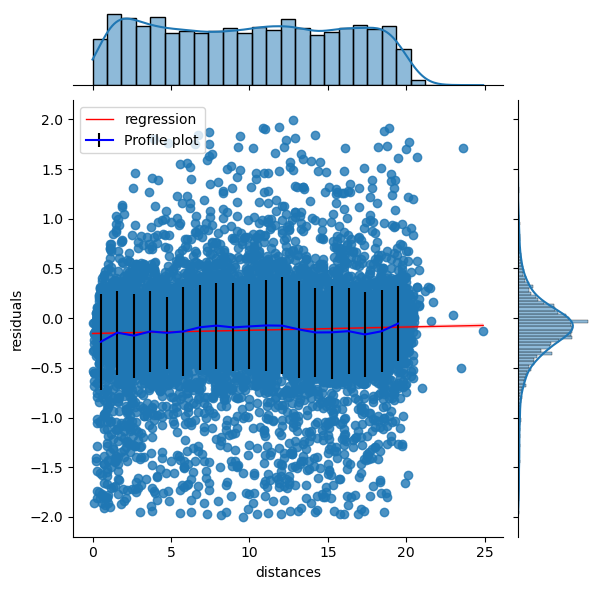

In [72]:
# Load the file as a Pandas DataFrame
df = pd.DataFrame(np.load('residuals_261.npy', allow_pickle = True).item())

# Inspect the dataset
df

# Clean the sample by selecting the entries(rows) with the variable 'residuals' in absolute value smaller than 2
cleaned_df = df[np.abs(df['residuals']) < 2]

# Perform a linear regression of "residuals" versus "distances" using scipy.stats.linregress()
params = stats.linregress(cleaned_df['distances'], cleaned_df['residuals'])
dist = np.linspace(cleaned_df['distances'].min(), cleaned_df['distances'].max(), 1000)
res = params[0]*dist + params[1]
plt.plot(dist, res, color = 'red')
plt.scatter(cleaned_df['distances'], cleaned_df['residuals'])
plt.title("Linear regression on cleaned data with scipy.stats")

# plot a seaborn jointplot of "residuals" versus "distances", having seaborn performing a linear regression. 
# The result of the regression should be displayed on the plot
sns.jointplot(x="distances", y="residuals", data=cleaned_df, kind = 'reg', line_kws = {'color':'red', 'linewidth': 1, 'label':'regression'})

# Fill 3 numpy arrays and show the profile plot
# x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
bins_edges= np.linspace(0,20,20)
x = (bins_edges[1:]+bins_edges[:-1])/2

# y, the mean values of the "residuals", estimated in slices (bins) of "distance"
# erry, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
y = []
erry = []
for i in range(len(bins_edges)-1):  
    mask = (cleaned_df['distances'] >= bins_edges[i]) & (cleaned_df['distances'] < bins_edges[i + 1])
    # another way to do this is: 
    # mask = df['distances'].between(bin_edges[i], bin_edges[i+1], inclusive="left")
    residuals = cleaned_df['residuals'][mask] 
    y.append(residuals.mean()) # Append mean and std deviation of residuals in this this bin
    erry.append(residuals.std())
    
plt.errorbar(x,y,yerr=erry, color='blue',ecolor='black', label = 'Profile plot')
plt.legend()
plt.show()